In [ ]:
import warnings
warnings.filterwarnings("ignore")
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
import numpy as np
#technical analysis
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

In [ ]:
df = yf.download(
    "SPY",
    start=date.today() - timedelta(days=365*10),
    end=date.today(),
    progress=False
)
df.describe()
print("\nMissing values in the dataframe:")
print(df.isnull().sum())
# Check data types
print("\nData types of the columns:")
print(df.dtypes)
# Identify missing dates
all_dates = pd.date_range(start=date.today() - timedelta(days=365*10), end=date.today(), freq='B')
missing_dates = all_dates.difference(df.index)
# Display the missing dates if any
if len(missing_dates) > 0:
    print("Missing trading dates:")
    print(missing_dates)
else:
    print("No missing trading dates.")


Missing values in the dataframe:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data types of the columns:
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Missing trading dates:
DatetimeIndex(['2014-09-01', '2014-11-27', '2014-12-25', '2015-01-01',
               '2015-01-19', '2015-02-16', '2015-04-03', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-03-25',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-04-14', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
               '2018-09-03', '201

mean return of SPY + std_dev:  1.0110415263413217
mean return of SPY - std_dev:  0.9899060750857682


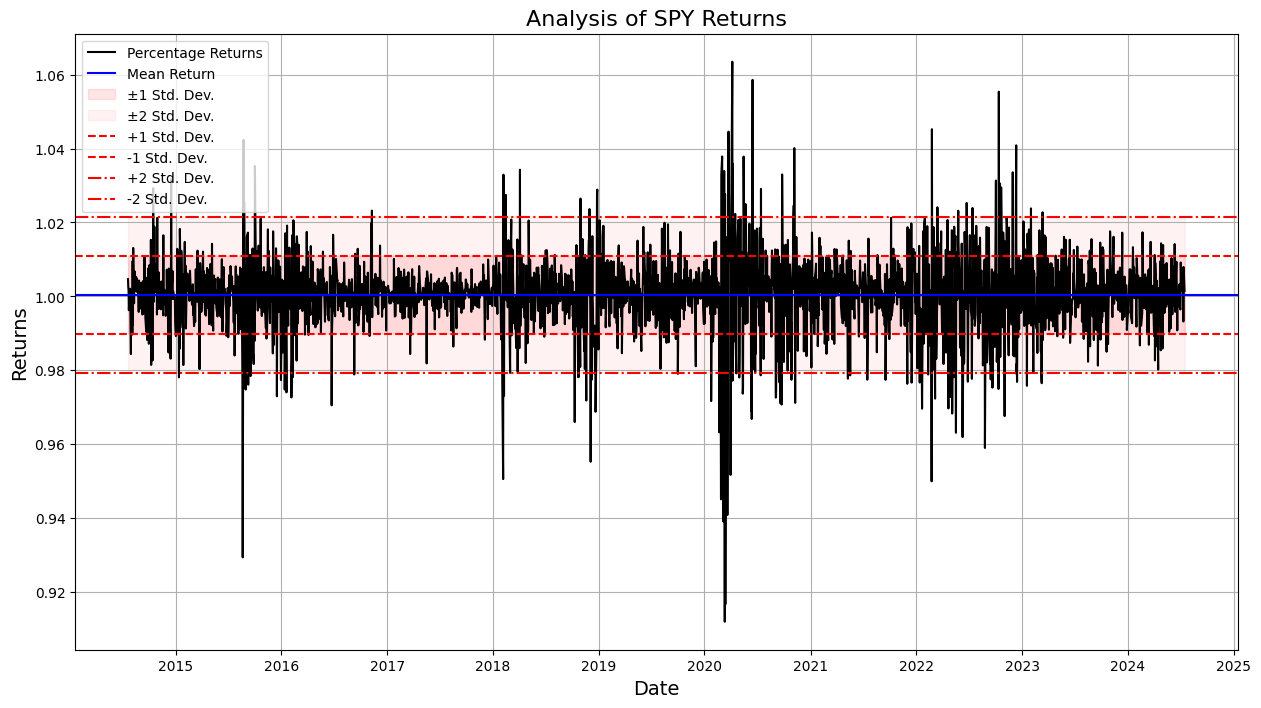

In [ ]:
# Basic metrics analysis: Return Analysis
df['return'] = df['Open'].shift(-1)/df['Open']
# Mean and Std.Dev of return
mean_return = df['return'].mean()
std_dev = df['return'].std()
#print("Mean return:", mean_return)  # ----- 0,047%
print('mean return of SPY + std_dev: ',mean_return + std_dev )
print('mean return of SPY - std_dev: ',mean_return - std_dev )
# Advanced Plot
# plt.figure(figsize=(15,8))
# plt.title('Analysis of SPY Returns')
# plt.plot(df['return'], color='black', label='Percentage Returns')
# plt.axhline(y=mean_return, color='red', linestyle='-')
# plt.axhline(y=mean_return+(std_dev*2), color='red', linestyle='--')
# plt.axhline(y=mean_return+(std_dev*1), color='red', linestyle='--')
# plt.axhline(y=mean_return-(std_dev*1), color='red', linestyle='--')
# plt.axhline(y=mean_return-(std_dev*2), color='red', linestyle='--')
# plt.legend(loc='upper left')
# plt.grid()
# plt.show()
# Enhanced Plot
plt.figure(figsize=(15, 8))
plt.title('Analysis of SPY Returns', fontsize=16)
plt.plot(df['return'], color='black', label='Percentage Returns')
plt.axhline(y=mean_return, color='blue', linestyle='-', label='Mean Return')

# Fill areas for standard deviations
plt.fill_between(df.index, mean_return + std_dev, mean_return - std_dev, color='red', alpha=0.1, label='±1 Std. Dev.')
plt.fill_between(df.index, mean_return + 2*std_dev, mean_return - 2*std_dev, color='red', alpha=0.05, label='±2 Std. Dev.')

# Add standard deviation lines
plt.axhline(y=mean_return + std_dev, color='red', linestyle='--', label='+1 Std. Dev.')
plt.axhline(y=mean_return - std_dev, color='red', linestyle='--', label='-1 Std. Dev.')
plt.axhline(y=mean_return + 2*std_dev, color='red', linestyle='-.', label='+2 Std. Dev.')
plt.axhline(y=mean_return - 2*std_dev, color='red', linestyle='-.', label='-2 Std. Dev.')

plt.legend(loc='upper left')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# return distribution

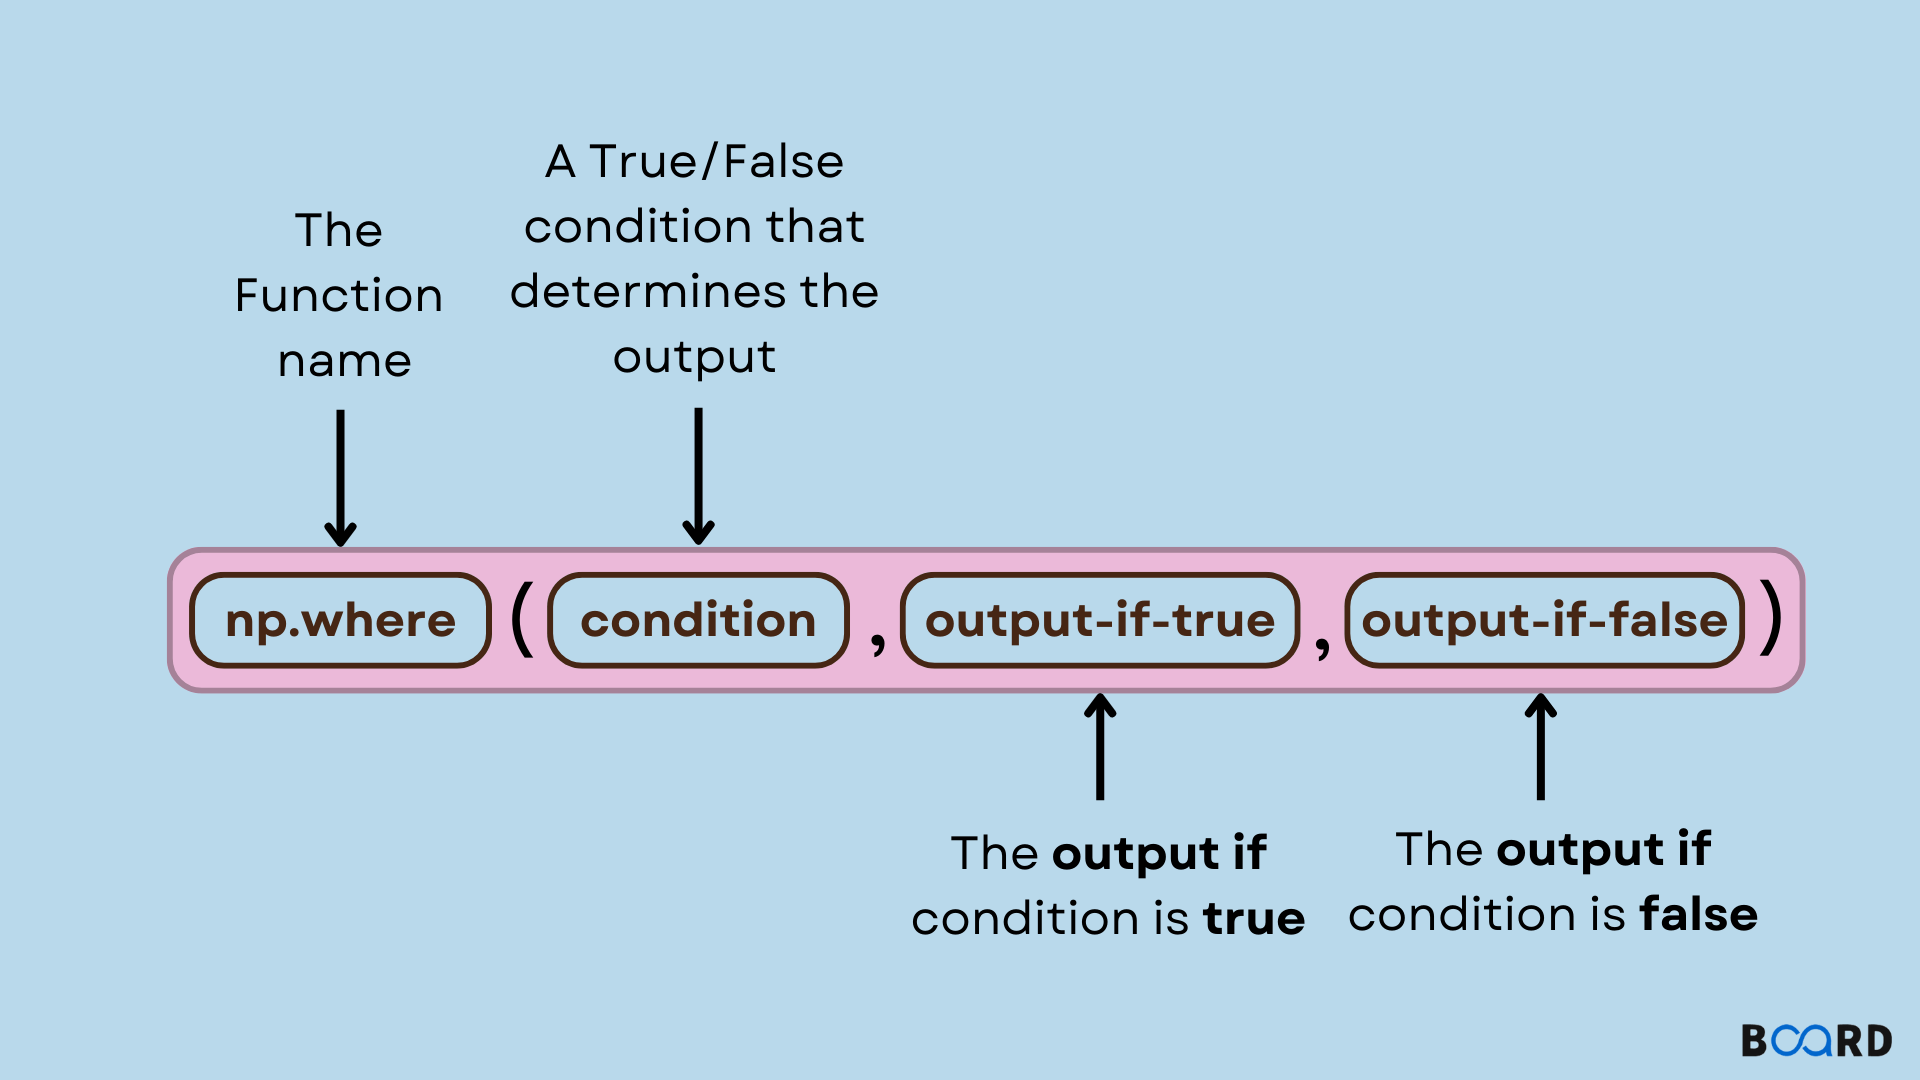

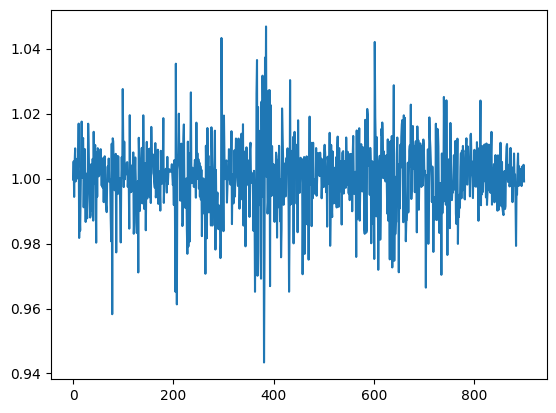

In [ ]:
# volatility analysis
"""
            np.where() tạo mảng dựa trên điều kiện
            ----------------------------------------
            Phương thức shift(1) di chuyển tất cả các giá trị trong cột 'volatility' xuống 1 hàng.
            Điều này có nghĩa là chúng ta đang so sánh với độ biến động của ngày hôm trước.
            ----------------------------------------
            .ge() là phương thức "greater than or equal to" (lớn hơn hoặc bằng).
            df['volatility'].mean() tính giá trị trung bình của cột 'volatility'.
            ----------------------------------------
            điều kiện sai sẽ trả về giấ trị -'0'
            ----------------------------------------
            df['volatility'].shift(1).ge(df['volatility'].mean())

            """
df['volatility']= df['High']/df['Low']
high_volatility=np.where(df['volatility'].shift(1).ge(df['volatility'].mean()),
                         df['Close']/df['Open'],
                         0)
high_volatility= high_volatility[high_volatility!=0]
plt.plot(high_volatility)
plt.show()

In [ ]:
"""
  RSI (Relative Strength Index) với độ dài 2 và 14
  Tỷ lệ giữa giá đóng cửa và Moving Average với độ dài 14 và 30
  Williams %R với độ dài 10
"""
df['RSI(2)'] = ta.rsi(close=df['Close'], length=2)
df['RSI(14)'] = ta.rsi(close=df['Close'], length=14)
df['Close / Moving Average(14)'] = df['Close'] / ta.sma(close=df['Close'], length=14)
df['Close / Moving Average(30)'] = df['Close'] / ta.sma(close=df['Close'], length=30)
df['WILLR(10)'] = ta.willr(high=df['High'], low=df['Low'], close=df['Close'], length=10)
df = df.dropna()

In [ ]:
"""
Dựa trên các chỉ báo được tính toán trong đoạn code,
có thể suy ra một số chiến lược giao dịch (strategies) tiềm năng:
 ---------------RSI (2) và RSI (14):
RSI ngắn hạn (2 ngày) có thể được sử dụng để phát hiện các đảo chiều ngắn hạn.
RSI dài hạn hơn (14 ngày) thường được dùng để xác định xu hướng tổng thể.
Chiến lược có thể bao gồm mua khi RSI dưới 30 (oversold) và bán khi trên 70 (overbought).
 ---------------Close / Moving Average (14) và (30):
Tỷ lệ này so sánh giá hiện tại với trung bình động.
Khi tỷ lệ > 1, giá đang trên MA, có thể là tín hiệu tăng.
Khi tỷ lệ < 1, giá đang dưới MA, có thể là tín hiệu giảm.
Giao cắt giữa hai đường MA có thể chỉ ra thay đổi xu hướng.
 ---------------Williams %R (10):
Chỉ báo này dao động từ 0 đến -100.
Giá trị dưới -80 thường được coi là oversold (cơ hội mua).
Giá trị trên -20 thường được coi là overbought (cơ hội bán).

Chiến lược tổng hợp có thể bao gồm:
    Xác nhận tín hiệu từ nhiều chỉ báo (ví dụ: RSI và Williams %R cùng chỉ oversold).
    Sử dụng MA để xác định xu hướng dài hạn và RSI/Williams %R cho tín hiệu ngắn hạn.
    Kết hợp với phân tích khối lượng giao dịch và mô hình giá để có quyết định chính xác hơn.
"""

'\nDựa trên các chỉ báo được tính toán trong đoạn code,\ncó thể suy ra một số chiến lược giao dịch (strategies) tiềm năng:\n ---------------RSI (2) và RSI (14):\nRSI ngắn hạn (2 ngày) có thể được sử dụng để phát hiện các đảo chiều ngắn hạn.\nRSI dài hạn hơn (14 ngày) thường được dùng để xác định xu hướng tổng thể.\nChiến lược có thể bao gồm mua khi RSI dưới 30 (oversold) và bán khi trên 70 (overbought).\n ---------------Close / Moving Average (14) và (30):\nTỷ lệ này so sánh giá hiện tại với trung bình động.\nKhi tỷ lệ > 1, giá đang trên MA, có thể là tín hiệu tăng.\nKhi tỷ lệ < 1, giá đang dưới MA, có thể là tín hiệu giảm.\nGiao cắt giữa hai đường MA có thể chỉ ra thay đổi xu hướng.\n ---------------Williams %R (10):\nChỉ báo này dao động từ 0 đến -100.\nGiá trị dưới -80 thường được coi là oversold (cơ hội mua).\nGiá trị trên -20 thường được coi là overbought (cơ hội bán).\n\nChiến lược tổng hợp có thể bao gồm:\n    Xác nhận tín hiệu từ nhiều chỉ báo (ví dụ: RSI và Williams %R cùng ch

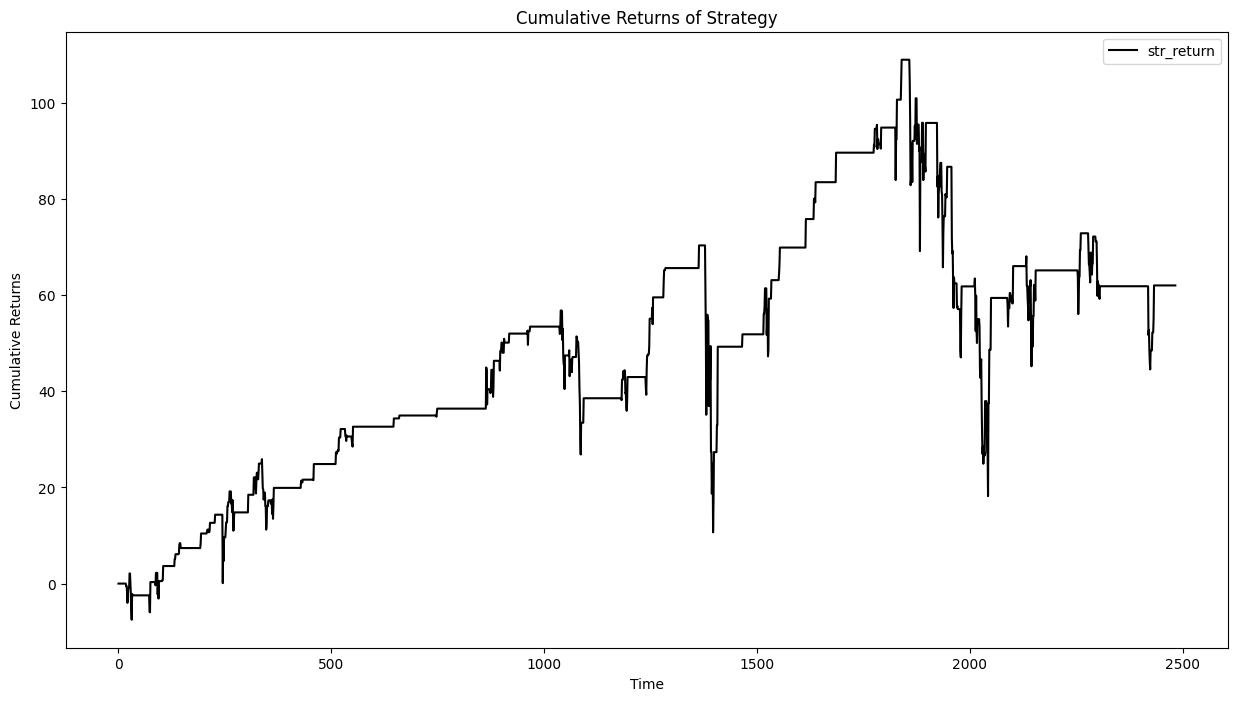

In [ ]:
# Simple backtest
"""Mua khi RSI(2) < 50 (điều kiện oversold) và giá đóng cửa dưới MA(30) (xu hướng giảm).
Lợi nhuận được tính là chênh lệch giữa giá mở cửa sau 2 ngày và 1 ngày.
=>>Đây là backtest đơn giản, không tính đến phí giao dịch và trượt giá.
Chiến lược này giả định mua vào cuối ngày và bán sau 1 ngày."""
my_strategies = np.where(
    (df['RSI(2)'] < 50) & (df['Close / Moving Average(30)'] < 0.99),
    df['Open'].shift(-2) - df['Open'].shift(-1),
    0
)
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(my_strategies), color='black', label="str_return")
plt.legend()
plt.title("Cumulative Returns of Strategy")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.show()